In [1]:
# import packages
import sys
import os.path
import numpy as np
np.seterr(divide='ignore',invalid='ignore')
import pandas as pd
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
import seaborn as sns
sns.set()

from spykshrk.realtime.datatypes import Datatypes
import loren_frank_data_processing as lfdp
from loren_frank_data_processing import Animal
import trodes2SS
import scipy as sp
import sungod_util
from spykshrk.franklab.data_containers import RippleTimes, pos_col_format#FlatLinearPosition, SpikeFeatures, Posteriors, \
         #EncodeSettings, pos_col_format, SpikeObservation, RippleTimes, DayEpochEvent, DayEpochTimeSeries

%load_ext autoreload
%autoreload 2

idx = pd.IndexSlice
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 120)

In [ ]:
# cell to start up holoviews
import holoviews as hv

import scipy as sp

hv.extension('bokeh')

In [ ]:
# cell to test and make sure holoviews and bokeh are working
coords = np.random.rand(50,2)
points = hv.Points(coords)

points.opts(color='k', marker='+', size=10)

In [209]:
exp_list = np.zeros((1,10))
exp_list[0][2]

0.0

In [218]:
# test sampling from exponential function
exp_list = np.zeros((1,50))
for i in np.arange(0,50):
    exp_list[0][i] = np.random.exponential(scale=30.0, size=None)
#np.around(exp_list,decimals=2)

<IPython.core.display.Javascript object>


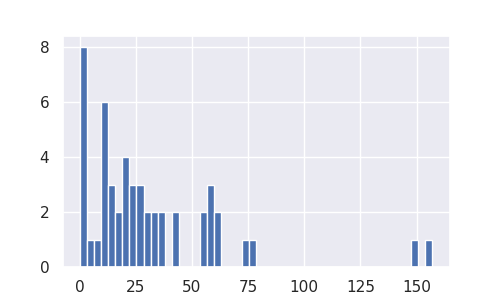

(array([8., 1., 1., 6., 3., 2., 4., 3., 3., 2., 2., 2., 0., 2., 0., 0., 0.,
        2., 3., 2., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1.]),
 array([  0.26569727,   3.4007034 ,   6.53570954,   9.67071567,
         12.8057218 ,  15.94072793,  19.07573406,  22.2107402 ,
         25.34574633,  28.48075246,  31.61575859,  34.75076472,
         37.88577085,  41.02077699,  44.15578312,  47.29078925,
         50.42579538,  53.56080151,  56.69580765,  59.83081378,
         62.96581991,  66.10082604,  69.23583217,  72.37083831,
         75.50584444,  78.64085057,  81.7758567 ,  84.91086283,
         88.04586896,  91.1808751 ,  94.31588123,  97.45088736,
        100.58589349, 103.72089962, 106.85590576, 109.99091189,
        113.12591802, 116.26092415, 119.39593028, 122.53093641,
        125.66594255, 128.80094868, 131.93595481, 135.07096094,
        138.20596707, 141.34097321, 144.47597934, 147.61098547,
      

In [219]:
plt.figure(figsize=(5,3))
plt.hist(exp_list[0],bins=50)

In [223]:
np.random.exponential(scale=30.0, size=None)

36.936610537940155

In [6]:
# cell to read real-time hdf5 file

#12-17, bill run session 3
#hdf_file = '/stelmo/mcoulter/spykshrk_output/bill/20191217_bill_05_r3_westerlies_streaming.rec_merged.h5'

# new pos/vel and fix prob no spike
#hdf_file = '/stelmo/mcoulter/spykshrk_output_westerlies/remy_decoder_19tet_2_13_prob_no.rec_merged.h5'

# 2-19 trodes 2 spike fix
#hdf_file = '/stelmo/mcoulter/spykshrk_output_westerlies/remy_decoder_19tet_2_19_spike_fix_whole.rec_merged.h5'

# 2-20 trodes 2 spike fix, new posterior sum times
#hdf_file = '/stelmo/mcoulter/spykshrk_output_westerlies/remy_decoder_19tet_2_20_post_sum_length.rec_merged.h5'

# 2-21 trodes 2 spike fix, more complete post sum record
#hdf_file = '/stelmo/mcoulter/spykshrk_output_westerlies/remy_decoder_19tet_2_21_post_sum_record.rec_merged.h5'

# 2-22 trodes 2 spike fix, 20 msec delay after ripple detection to start sum
#hdf_file = '/stelmo/mcoulter/spykshrk_output_westerlies/remy_decoder_19tet_2_22_post_sum_delay.rec_merged.h5'

# 3-26 lfp config fix, 5 lfp tets, rip sd = 4, crossing tets = 2
#hdf_file = '/stelmo/mcoulter/spykshrk_output_westerlies/remy_decoder_19tet_3_26_fix_lfp_ref.rec_merged.h5'

# 3-26 lfp config fix, 10 lfp tets, rip sd = 4, crossing tets = 4
hdf_file = '/stelmo/mcoulter/spykshrk_output_westerlies/remy_decoder_19tet_3_26_10_lfp_tets.rec_merged.h5'


store = pd.HDFStore(hdf_file, mode='r')

In [3]:
# 2-22 post sum delayed 20msec
encoder_data = store['rec_3']
decoder_data = store['rec_4']
decoder_missed_spikes = store['rec_5']
likelihood_data = store['rec_6']
occupancy_data = store['rec_7']
ripple_data = store['rec_1']
#stim_state = store['rec_10']
stim_lockout = store['rec_11']
stim_message = store['rec_12']
timing = store['rec_100']

In [5]:
# 3-26 lfp config fix, 5 lfp tets, rip sd = 4, crossing tets = 2
encoder_data1 = store['rec_3']
decoder_data1 = store['rec_4']
decoder_missed_spikes1 = store['rec_5']
likelihood_data1 = store['rec_6']
occupancy_data1 = store['rec_7']
ripple_data1 = store['rec_1']
#stim_state = store['rec_10']
stim_lockout1 = store['rec_11']
stim_message1 = store['rec_12']
timing1 = store['rec_100']

In [7]:
# 3-26 lfp config fix, 10 lfp tets, rip sd = 4, crossing tets = 4
encoder_data2 = store['rec_3']
decoder_data2 = store['rec_4']
decoder_missed_spikes2 = store['rec_5']
likelihood_data2 = store['rec_6']
occupancy_data2 = store['rec_7']
ripple_data2 = store['rec_1']
#stim_state = store['rec_10']
stim_lockout2 = store['rec_11']
stim_message2 = store['rec_12']
timing2 = store['rec_100']

In [8]:
print(stim_lockout.shape)
print(stim_lockout1.shape)
print(stim_lockout2.shape)

(2027, 7)
(9757, 7)
(3924, 7)


In [177]:
stim_message2[stim_message2['ripple_number']==383]
#stim_message2[stim_message2['shortcut_message_sent']==1]

,rec_ind,bin_timestamp,spike_timestamp,lfp_timestamp,time,shortcut_message_sent,ripple_number,ripple_time_bin,delay,spike_count,...,max_arm_repeats,box,arm1,arm2,arm3,arm4,arm5,arm6,arm7,arm8
439,217865,112179450,112179758,112179840,1.582241e+09,0,383,1,13.0,19,...,1,0.673358,0.002915,0.005066,0.015387,0.003605,0.190804,0.085998,0.010814,0.012054
440,217883,112180950,112181826,112182000,1.582241e+09,1,383,11,35.0,76,...,1,0.368256,0.096005,0.002976,0.001217,0.001820,0.524358,0.001969,0.001720,0.001679


In [179]:
sum(decoder_data2['spike_count'].values)
test_ripple = decoder_data2[(decoder_data2['bin_timestamp']>=112179450) & (decoder_data2['bin_timestamp']<=112180950)]
sum(test_ripple['spike_count'].values)

71

In [171]:
encoder_data2.shape[0] - decoder_missed_spikes2.shape[0]

1341300

In [6]:
# DO NOT USE - old linearization
#this is the most recent offline decode
file_path = '/stelmo/mcoulter/oct_2019_decoding/remy_20_2_shuffle_0_posteriors_functionalized_150_decode_whole.h5'
hdf_base = '/analysis'
hdf_grps = 'decode/clusterless/offline/posterior'
hdf_label = 'sungod_trans_mat'

with pd.HDFStore(file_path, 'r') as store:
    main_path = os.path.join(hdf_base, hdf_grps, hdf_label)
    posteriors2 = store[main_path]

In [9]:
# This offline data is good
# most recent offline decode with new linearization
file_path = '/stelmo/mcoulter/raw_data/remy/remy_20_2_shuffle_0_posteriors_2_20_offline_new_linear.h5'
hdf_base = '/analysis'
hdf_grps = 'decode/clusterless/offline/posterior'
hdf_label = 'sungod_trans_mat'

with pd.HDFStore(file_path, 'r') as store:
    main_path = os.path.join(hdf_base, hdf_grps, hdf_label)
    posteriors2 = store[main_path] 


In [10]:
# get linear position for offline
# TO DO: update for location of new linearized position files

#### Define parameters
rat_name = 'remy'
day =  20     #previously:{'remy':[20], 'gus':[28], 'bernard':[23], 'fievel':[19]}
epoch = 2   # previously:{'remy':[4], 'gus':[2], 'bernard':[4], 'fievel':[2]} 

# define data source filepaths
path_base = '/stelmo/mcoulter/'
#path_base = '/mnt/vortex/mcoulter/'
raw_directory = path_base + 'raw_data/' + rat_name + '/'
# old linearization
#linearization_path = path_base + 'maze_info/'
# new linearization
linearization_path = '/stelmo/mcoulter/raw_data/'
day_ep = str(day) + '_' + str(epoch)

#tetlist = None
tetlist = [4]
tetrodes= tetlist

pos_bin_size = 5
velocity_thresh_for_enc_dec = 4
velocity_buffer = 0
shift_amt_for_shuffle = 0
use_enc_as_dec = 1   #if you want to use the encoding marks as the decoding marks
discrete_tm_val=.99   # for classifier

# IMPORT and process data
#initialize data importer
datasrc = trodes2SS.TrodesImport(raw_directory, rat_name, [day], 
                       [epoch], tetrodes)
# Import trials
trials = datasrc.import_trials()
# Import raw position
linear_pos_raw = datasrc.import_pos(xy='x')   # this is basically just to pull in speed, will be replaced with linearized below
#posY = datasrc.import_pos(xy='y')          #  OPTIONAL; useful for 2d visualization

# if linearization exists, load it. if not, run the linearization.
lin_output1 = linearization_path + rat_name + '/' + rat_name + '_' + day_ep + '_' + 'linearized_distance.npy'
lin_output2 = linearization_path + rat_name + '/' + rat_name + '_' + day_ep + '_' + 'linearized_track_segments.npy'
linear_pos_raw['linpos_flat'] = np.load(lin_output1)   #replace x pos with linerized 
track_segment_ids = np.load(lin_output2)
print('Linearization found. Loading it')

#if os.path.exists(lin_output1) == False:
#    print('Linearization result doesnt exist. Doing linearization calculation')
#    sungod_util.run_linearization_routine(rat_name, day, epoch, linearization_path, raw_directory, gap_size=20)
#    linear_pos_raw['linpos_flat'] = np.load(lin_output1)
#    track_segment_ids = np.load(lin_output2)
#else: 

# generate boundary definitions of each segment
arm_coords, _ = sungod_util.define_segment_coordinates(linear_pos_raw, track_segment_ids)  # optional addition output of all occupied positions (not just bounds)

#bin linear position 
binned_linear_pos, binned_arm_coords, pos_bins = sungod_util.bin_position_data(linear_pos_raw, arm_coords, pos_bin_size)

# for using new linearization nodes
binned_arm_coords[:,1] = 1+binned_arm_coords[:,1]
print(binned_arm_coords)
#pos_bin_delta = 1

# Import ripples
rips_tmp = datasrc.import_rips(linear_pos_raw, velthresh=4) 
rips = RippleTimes.create_default(rips_tmp,1)  # cast to rippletimes obj
print('Rips less than velocity thresh: '+str(len(rips)))


Linearization found. Loading it
[  0.   5.  10.  15.  20.  25.  30.  35.  40.  45.  50.  55.  60.  63.
  68.  73.  78.  83.  88.  93.  98. 103. 108. 113. 118. 123. 128. 133.
 138. 141. 146. 151. 156. 161. 166. 171. 176. 181. 186. 191. 196. 201.
 206. 211. 216. 220. 225. 230. 235. 240. 245. 250. 255. 260. 265. 270.
 275. 280. 285. 290. 295. 300. 302. 307. 312. 317. 322. 327. 332. 337.
 342. 347. 352. 357. 362. 367. 372. 377. 382. 387. 392. 397. 402. 407.
 412. 417. 422. 427. 432. 437. 442. 447. 452. 457. 461. 466. 471. 476.
 481. 486. 491. 496. 501. 506. 511. 516. 521. 526. 531. 536. 541. 542.
 547. 552. 557. 562. 567. 572. 577. 582. 587. 592. 597. 602. 607. 612.
 617. 620. 625. 630. 635. 640. 645. 650. 655. 660. 665. 670. 675. 680.
 685.]
[[  0   8]
 [ 13  25]
 [ 29  41]
 [ 45  57]
 [ 62  74]
 [ 78  90]
 [ 94 106]
 [111 123]
 [127 139]]
[[  0   9]
 [ 13  26]
 [ 29  42]
 [ 45  58]
 [ 62  75]
 [ 78  91]
 [ 94 107]
 [111 124]
 [127 140]]
Rips less than velocity thresh: 1256


In [430]:
# want to get rid of messages sent based on sum during length of the ripple - too many false positives
# remove duplicates from stim_message - should only have first message for each ripple
stim_messsage_no_dup = stim_message2.copy()
stim_messsage_no_dup['ripple_diff'] = stim_message2['ripple_number'].diff()
stim_message_to_use = stim_messsage_no_dup[stim_messsage_no_dup['ripple_diff']>0]
stim_message_to_use.shape

(670, 24)

In [431]:
# want to try to add both beginning of ripple and time bin when message was sent to decoder_data
# for stim_message this merge ('nearest') put the arm number and ripple number at all timebins after the end of the rippple
# for stim_lockout this merge ('backward') will highlight the ripple time
# stim_lockout timestamp_shift is the 70 msec shift to account for delay in realtime rip detection (-2100)
# currently it looks like the shift is set to 0

# which files to use
stim_message_file = stim_message_to_use
stim_lockout_file = stim_lockout2
decoder_data_file = decoder_data2

stim_message_1 = stim_message_file.copy()
stim_message_2 = stim_message_1.drop(['rec_ind','spike_timestamp','time','lfp_timestamp',
                                   'ripple_time_bin','spike_count',
                                   'content_threshold','max_arm_repeats','box','arm1','arm2',
                                   'arm3','arm4','arm5','arm6','arm7','arm8'], axis=1)
stim_message_2
decode_to_merge = decoder_data_file.copy()
merged_decoder_stim = pd.merge_asof(decode_to_merge,stim_message_2,on='bin_timestamp',direction='nearest')
merged_decoder_stim

stim_lockout_1 = stim_lockout_file.copy()
#stim_lockout_1['bin_timestamp'] = stim_lockout14['timestamp']
stim_lockout_1['timestamp_shift'] = stim_lockout_file['timestamp']
stim_lockout_1['bin_timestamp'] = stim_lockout_1['timestamp_shift']

stim_lockout_2 = stim_lockout_1.drop(['rec_ind','timestamp','time','tets_above_thresh',
                                      'big_rip_message_sent'], axis=1)
stim_lockout_2
##decode_to_merge = decoder_data1.copy()
merged_decoder_lockout = pd.merge_asof(merged_decoder_stim,stim_lockout_2,on='bin_timestamp',direction='backward')
merged_decoder_lockout.shape

(819872, 170)

In [ ]:
pd.set_option('display.max_rows', 10)
non_matching.shape
shortcut_message_times
stim_message_file[(stim_message_file['ripple_number']>46) & (stim_message_file['ripple_number']<55)]
#timstamp range 53865760 - 55748140

<IPython.core.display.Javascript object>


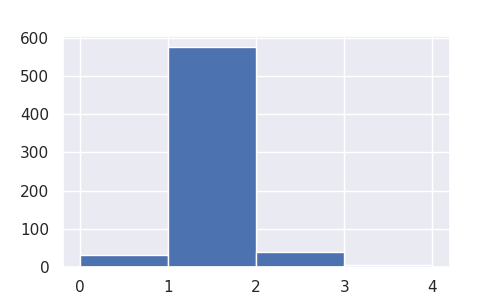

(array([ 31., 576.,  40.,   6.]),
 array([0, 1, 2, 3, 4]),
 <a list of 4 Patch objects>)

In [270]:
# several ripples are missing any entry for shortcut_message
# and several are duplicated
# okay figured this out - was problem with 20 msec delay - no longer using this
# duplicates are from allowed time for sum after ripple detection
plt.figure(figsize=(5,3))
plt.hist(stim_message_file['ripple_number'].diff().values,bins=np.arange(0,5))

In [339]:
non_matching[(non_matching['realtime_rip']>=101) & (non_matching['realtime_rip']<102)]['off_max_arm'].values[0]

5.0

In [458]:
# subset of decoder_data to plot - loop through each ripple
# how can we just generate the images for the mismatched ripples??

# which files to use
stim_message_file = stim_message_to_use
stim_lockout_file = stim_lockout2
decoder_data_file = decoder_data2

# new: stim_message
#realtime_posterior_sum_all = np.zeros((len(stim_message_file),4))
# original: stim_lockout
realtime_posterior_sum_all = np.zeros((len(stim_lockout_file[stim_lockout_file['lockout_state']==1]),4))

counter = -1
summarize_all_rips = True

# we could use stim_message lfp_timestamp instead here - it is ahead by 100-200 timestamps
#for timestamp in stim_message_file['lfp_timestamp'].values:
# original: used stim_lockout
for timestamp in stim_lockout_file[stim_lockout_file['lockout_state']==1]['timestamp'].values:
    counter += 1
    #print(timestamp)
    #if counter in non_matching['realtime_rip'].values:
        #print(counter)
    if summarize_all_rips:
    #print(timestamp-30*300,timestamp+30*300)
    #posterior from decode/stim message merged table
        merged_to_plot = merged_decoder_lockout[(merged_decoder_lockout['bin_timestamp'] > timestamp-30*300) & 
                                            (merged_decoder_lockout['bin_timestamp'] < timestamp+30*300)]
        merged_to_plot.set_index('bin_timestamp',inplace=True)

        posterior_only_merged = merged_to_plot.drop(['rec_ind','wall_time','velocity','real_pos',
                                                'spike_count','ripple','ripple_length','timestamp_shift',
                                                'shortcut_message','box','arm1','arm2','arm3','arm4','arm5',
                                                'arm6','arm7','arm8','posterior_max_arm','shortcut_message_sent',
                                                'raw_x','raw_y','smooth_x','smooth_y','ripple_number_x',
                                                'ripple_number_y','ripple_end','lockout_state','lockout_num',
                                                'delay','next_bin'], axis=1)
        # ripple time - generated from lockout_state
        # note: this does not inlcude the 70 msec before ripple detection
        # lockout_state changes at posterior_lock end, so this should post_lock (now 50 msec)
        ripples_to_plot = merged_to_plot.reset_index()
        ripple_times_rt = ripples_to_plot.index[ripples_to_plot['lockout_state'] > 0].tolist()

        # get timestamp when shortcut message was sent - try to just isolate single ripple
        # bin_timestamp will show the delay - it will appear before the start of the ripple
        # in contrast, lfp_timestamp would line up exactly with ripple start
        shortcut_message_to_plot = stim_message_file[(stim_message_file['lfp_timestamp'] > timestamp-30*30) & 
                                             (stim_message_file['lfp_timestamp'] < timestamp+30*100)]
        merged_to_plot_index = merged_to_plot.reset_index()
        # loop through multiple entries in shortcut_message
        shortcut_message_times = np.zeros(shortcut_message_to_plot.shape[0])
        for i in np.arange(0,shortcut_message_to_plot.shape[0]):
            shortcut_message_times[i] = merged_to_plot_index.index[merged_to_plot_index['bin_timestamp'].values == shortcut_message_to_plot['bin_timestamp'][i:i+1].values].tolist()[0]
            #print(shortcut_message_to_plot['box'][i:i+1].values,shortcut_message_to_plot['arm1'][i:i+1].values,
            #      shortcut_message_to_plot['arm2'][i:i+1].values,shortcut_message_to_plot['arm3'][i:i+1].values,
            #      shortcut_message_to_plot['arm4'][i:i+1].values,shortcut_message_to_plot['arm5'][i:i+1].values,
            #      shortcut_message_to_plot['arm6'][i:i+1].values,shortcut_message_to_plot['arm7'][i:i+1].values,
            #      shortcut_message_to_plot['arm8'][i:i+1].values)
        #shortcut_message_times = merged_to_plot_index.index[merged_to_plot_index['bin_timestamp'].values == shortcut_message_to_plot['bin_timestamp'].values].tolist()
        shortcut_messages = shortcut_message_to_plot['shortcut_message_sent'].values*123
    
        #posterior_only
        #print(posterior_only_merged.shape)
    
        #plot heatmap with posterior surrounding each ripple
        post_heatmap = posterior_only_merged.transpose()
        post_heatmap = post_heatmap.iloc[::-1]
    
        #plot title: include ripple number, max arm, and delay
        title_index = int(len(merged_to_plot)*0.6)
        max_arm = merged_to_plot[title_index:title_index+1]['posterior_max_arm'].values
        #ripple_num = merged_to_plot[-2:-1]['ripple_number_y'].values
        #f'Real-time posterior, ripple {max_arm}. Max arm {ripple_num}'
        #ripple_num = merged_to_plot[ripple_num_index:ripple_num_index+1]['ripple_number_y'].values
        ripple_num = merged_to_plot[title_index:title_index+1]['lockout_num'].values
        message_delay = np.around(merged_to_plot[title_index:title_index+1]['delay'].values,decimals=0)
        offline_max = non_matching[(non_matching['realtime_rip']>=counter) & 
                                   (non_matching['realtime_rip']<counter+1)]['off_max_arm'].values

        # fill in current row of posterior sum array - seems to work
        realtime_posterior_sum_all[counter,0] = ripple_num
        realtime_posterior_sum_all[counter,1] = max_arm
        realtime_posterior_sum_all[counter,2] = shortcut_message_to_plot.shape[0]-1
        realtime_posterior_sum_all[counter,3] = message_delay
    
        #plt.figure(figsize=(12,5))
        #plt.title(f'Real-time posterior, Ripple {ripple_num} RT max {max_arm} Off max {offline_max} Delay {message_delay}')
        #ax = (sns.heatmap(post_heatmap,vmin=0, vmax=0.7))
        ##gap lines need to be inverse of where you would expect
        #ax.hlines([135-9,135-25,135-41,135-57,135-73,135-89,135-105,135-121], lw=2, color='w',*ax.get_xlim())
        ##ax.scatter(np.arange(0,merged_to_plot.shape[0]),136-merged_to_plot['real_pos'].values,s=1,alpha=0.5,color='cyan')
        ##ax.scatter(stim_lockout['timestamp'].values,(stim_lockout['lockout_state'].values)*50,s=2,alpha=1)
        #ax.vlines(ripple_times_rt,lw=1,color='w',alpha=0.3,*ax.get_ylim())
        ## plot time when statescript message was sent, 100 = sent, 0 = not send
        ## if X is missing it means the timestamp didn't match perfectly above
        ## could take delay into account here: add delay/5
        #ax.scatter(shortcut_message_times+message_delay/5,124-shortcut_messages,s=40,color='yellow',marker='x')

        # try to find ripple number
        #ax.scatter(np.arange(0,merged_to_plot.shape[0]),136-merged_to_plot['ripple_number_y'].values+20,s=1,alpha=0.5,color='red')
        # need to convert sent_message_list into values starting where beginning of this plot is x=0
        #ax.vlines(100,lw=1,color='w',alpha=1,*ax.get_ylim())
    
        # final step: save the figure
        #plt.savefig(f'/stelmo/mcoulter/posterior_plots_by_ripple/remy_20_2_realtime_2_20_nonmatching_{ripple_num}_timestamp_{timestamp}.jpg')

# convert offline_posterior_sum_all array to pandas
# only run first time through, before matching
realtime_post_sum_summary = pd.DataFrame(data=realtime_posterior_sum_all,columns=('realtime_rip','rt_max_arm',
                                                                                  'rt_two_messages','rt_delay'))
realtime_post_sum_summary.shape

# check numbering for ripples 4, 5, 6
# also, looks like it never switch to an outer arm if the decode starts in the box
# looks like many replays fail because it doesn't get 10 bins of data - this may be a result of empty bins

(684, 4)

In [ ]:
# non-matching
non_matching[0:10]

In [ ]:
# plot replay arms for real-time ripples
realtime_post_sum_summary[80:90]
#plt.hist(realtime_post_sum_summary['rt_max_arm'].values,bins=np.arange(0,100))
#realtime_post_sum_summary[realtime_post_sum_summary['rt_two_messages']>0]
realtime_post_sum_summary.shape
print(realtime_post_sum_summary.shape)
realtime_post_sum_summary[(realtime_post_sum_summary['rt_max_arm']>=1) & (realtime_post_sum_summary['rt_max_arm']<=8)]


In [378]:
# DONT use: replaced with merge from other direction in next cell
# to match offline, add 1958987 to realtime timestamps
# shift for realtime ripple detection delay: subtract 2100
#45317550 45321300

# choose files
stim_message_file = stim_message_to_use
stim_lockout_file = stim_lockout2
decoder_data_file = decoder_data2

realtime_rips = stim_lockout_file[stim_lockout_file['lockout_state']==1]
print('realtime rips',realtime_rips.shape)
offline_rips = rips.reset_index()
print('offline rips',offline_rips.shape)
offline_rips['adj_timestamp'] = offline_rips['timestamp']
#realtime_rips['adj_timestamp'] = realtime_rips['timestamp']+1958987-2100
# remove 70 msec adjustment for real-time ripples for better matching
realtime_rips['adj_timestamp'] = realtime_rips['timestamp']+1958987

realtime_rips
# merge real-time and offline ripples 
# offline ripple start is 50-100 msec before real-time
# try a tolerance of 100 msec = 3000 timestamps
# one problem is that we are only matching to the start of the offline ripple - but long ripples will get split in 2
# so we really want to match over the whole interval of the offline ripple
merged_ripple_times = pd.merge_asof(offline_rips,realtime_rips,on='adj_timestamp',tolerance=9000,direction='forward')
matching_offline_rips = merged_ripple_times[merged_ripple_times['lockout_num']>0]

# now need to remove duplicates: where a single real-time ripple is matched to two offline rips
matching_offline_rips['RT_dups'] = matching_offline_rips['lockout_num'].diff()
matching_offline_rips = matching_offline_rips[matching_offline_rips['RT_dups']>0]
print(matching_offline_rips.shape)

realtime rips (684, 7)
offline rips (1256, 7)
(547, 16)


In [28]:
# to match offline, add 1958987 to realtime timestamps
# shift for realtime ripple detection delay: subtract 2100
#45317550 45321300
# NOTE: here we are using real-time as left dataframe and offline as right, reversed from cell above
# this seems to work better!!

# choose files
stim_lockout_file = stim_lockout2

realtime_rips = stim_lockout_file[stim_lockout_file['lockout_state']==1]
print('realtime rips',realtime_rips.shape)
offline_rips = rips.reset_index()
print('offline rips',offline_rips.shape)
offline_rips['adj_timestamp'] = offline_rips['timestamp']
#realtime_rips['adj_timestamp'] = realtime_rips['timestamp']+1958987-2100
# remove 70 msec adjustment for real-time ripples for better matching
realtime_rips['adj_timestamp'] = realtime_rips['timestamp']+1958987

realtime_rips
# merge real-time and offline ripples 
# offline ripple start is 50-100 msec before real-time
# try a tolerance of 300 msec = 9000 timestamps
# one problem is that we are only matching to the start of the offline ripple - but long ripples will get split in 2
# so we really want to match over the whole interval of the offline ripple
merged_ripple_times = pd.merge_asof(realtime_rips,offline_rips,on='adj_timestamp',tolerance=9000,direction='backward')
matching_offline_rips = merged_ripple_times[merged_ripple_times['lockout_num']>0]

# offline ripple duration
matching_offline_rips['off_dur'] = matching_offline_rips['endtime']-matching_offline_rips['starttime']

# note: still a few duplicates - this is coming from the original list of realtime ripples (stim_lockout)

# save mismatched ripples separately
nonmatching_offline_rips = matching_offline_rips[matching_offline_rips['day'].isnull()]
# now need to remove ripples that dont match
matching_offline_rips = matching_offline_rips[matching_offline_rips['day']>0]

# 2 real-time rips match 1 offline rip
matching_offline_rips['two_RT_rips'] = matching_offline_rips['event'].diff()
# only keep rows where diff > 0 - this will remove double matches, specifically the second real-time rip
#matching_offline_rips = matching_offline_rips[matching_offline_rips['two_RT_rips']>0]

print('matching',matching_offline_rips.shape)

realtime rips (1309, 7)
offline rips (1256, 7)
matching (1016, 17)


In [ ]:
stim_message[stim_message['shortcut_message_sent']==1]

<IPython.core.display.Javascript object>


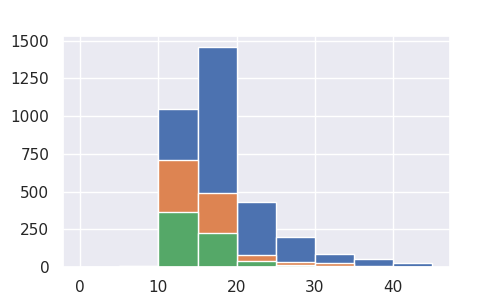

(array([  0.,   3., 364., 223.,  42.,  11.,   8.,   2.,   1.]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45]),
 <a list of 9 Patch objects>)

In [25]:
%matplotlib notebook
plt.figure(figsize=(5,3))
plt.hist(stim_message1['delay'].values,bins=np.arange(0,50,5),alpha=1)
plt.hist(stim_message2['delay'].values,bins=np.arange(0,50,5),alpha=1)
plt.hist(stim_message['delay'].values,bins=np.arange(0,50,5),alpha=1)

<IPython.core.display.Javascript object>


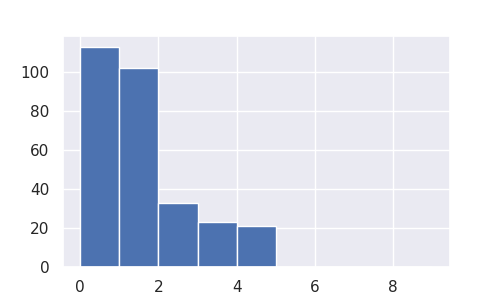

(array([113., 102.,  33.,  23.,  21.,   0.,   0.,   0.,   0.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

In [34]:
# looking at velocity of matching vs non-matching ripples
# result: non-matching ripples have much higher velocity - supports idea of theta power bleed through
matching_offline_rips
nonmatching_offline_rips
plt.figure(figsize=(5,3))
plt.hist(nonmatching_offline_rips['time'].values,bins=np.arange(0,10))
#plt.hist(matching_offline_rips['time'].values,bins=np.arange(0,10))

<IPython.core.display.Javascript object>


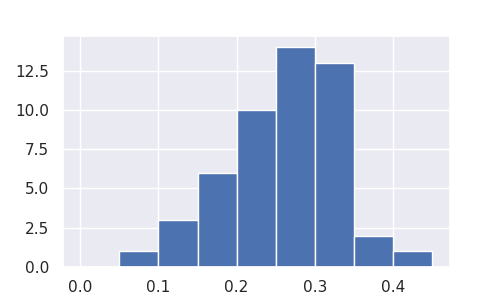

(array([ 0.,  1.,  3.,  6., 10., 14., 13.,  2.,  1.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
 <a list of 9 Patch objects>)

In [422]:
# duration of offline ripples
matching_offline_rips['dup_offline'] = matching_offline_rips['event'].diff()
offline_dup_ripples = matching_offline_rips[matching_offline_rips['dup_offline']==0]
plt.figure(figsize=(5,3))
plt.hist(offline_dup_ripples['off_dur'].values,bins=np.arange(0,0.5,.05))

<IPython.core.display.Javascript object>


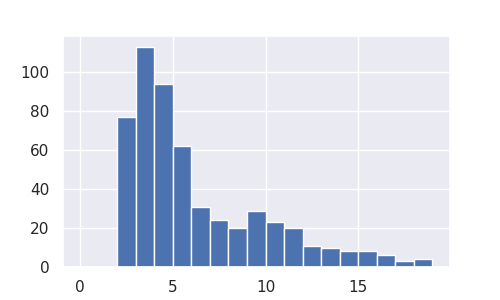

(array([  0.,   0.,  77., 113.,  94.,  62.,  31.,  24.,  20.,  29.,  23.,
         20.,  11.,  10.,   8.,   8.,   6.,   3.,   4.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 19 Patch objects>)

In [427]:
# duration of offline ripples
matching_offline_rips['dup_offline'] = matching_offline_rips['event'].diff()
offline_dup_ripples = matching_offline_rips[matching_offline_rips['dup_offline']>0]
offline_dup_ripples
plt.figure(figsize=(5,3))
#duration of offline
#plt.hist(offline_dup_ripples['off_dur'].values,bins=np.arange(0,0.5,.05))
#size of offline
plt.hist(offline_dup_ripples['maxthresh'].values,bins=np.arange(0,20))


<IPython.core.display.Javascript object>


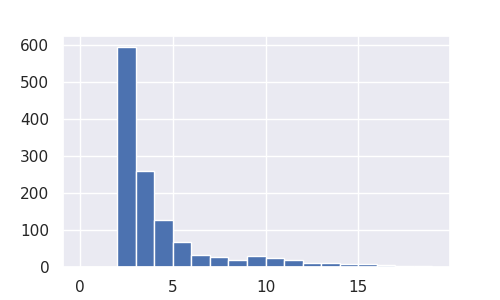

(array([  0.,   0., 595., 259., 128.,  67.,  32.,  27.,  20.,  29.,  23.,
         20.,  12.,  10.,   8.,   9.,   6.,   3.,   4.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 19 Patch objects>)

In [428]:
plt.figure(figsize=(5,3))
#duration of offline
#plt.hist(offline_dup_ripples['off_dur'].values,bins=np.arange(0,0.5,.05))
#size of offline
plt.hist(rips['maxthresh'].values,bins=np.arange(0,20))

<IPython.core.display.Javascript object>


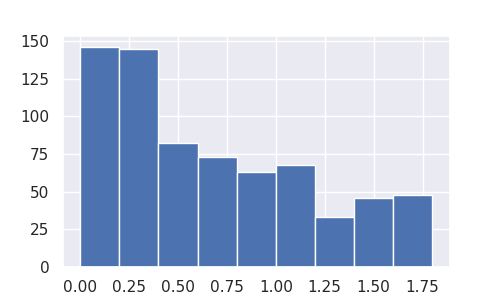

(array([146., 145.,  82.,  73.,  63.,  68.,  33.,  46.,  48.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8]),
 <a list of 9 Patch objects>)

In [466]:
rips_check = rips.copy()
rips_check['rip_space'] = rips_check['starttime'].diff()
rips_check
plt.figure(figsize=(5,3))
plt.hist(rips_check['rip_space'].values,bins=np.arange(0,2,.2))

In [ ]:
# check for duplicates or missing ripples
matching_offline_rips[0:10]
plt.figure(figsize=(5,3))
plt.hist(matching_offline_rips['lockout_num'].diff().values,bins=np.arange(0,10))

<IPython.core.display.Javascript object>


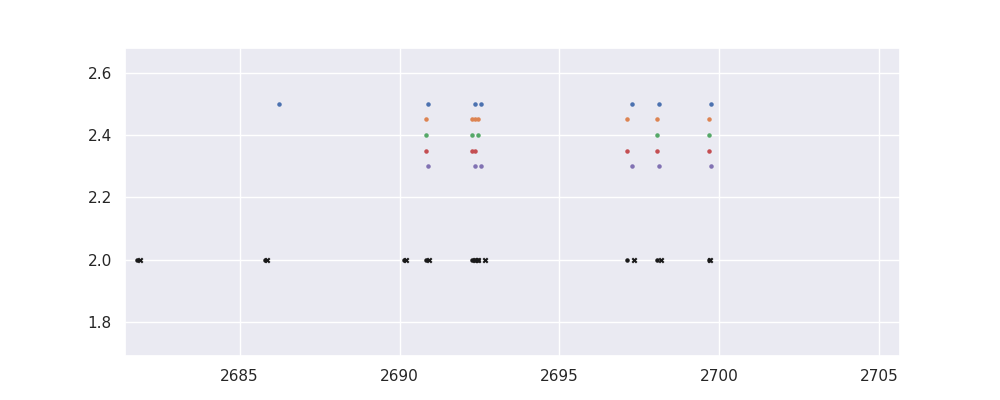

(1, 3)

In [395]:
# plot realtime and offline ripple starts
#matching_offline_rips_3k = matching_offline_rips.copy()
#matching_offline_rips_3k_fwd = matching_offline_rips.copy()
#matching_offline_rips_9k_fwd = matching_offline_rips.copy()

off_rips_range = rips.copy()
off_rips_range['end_timestamp'] = off_rips_range['timestamp'] + ((off_rips_range['endtime'] - off_rips_range['starttime'])*30000)
off_rips_range

stim_lockout_file = stim_lockout2
realtime_rips_plot = stim_lockout_file[stim_lockout_file['lockout_state']==1]

plt.figure(figsize=(10,4))
plt.scatter(off_rips_range['timestamp'].values/30000,np.repeat(2, 1256),s=5,c='k')
plt.scatter(off_rips_range['end_timestamp'].values/30000,np.repeat(2, 1256),s=10,c='k',marker='x')
plt.scatter((realtime_rips_plot['timestamp'].values+1958987)/30000,np.repeat(2.5, 684),s=5)
plt.scatter((matching_offline_rips_3k['adj_timestamp'].values)/30000,np.repeat(2.45, 547),s=5)
#plt.scatter((matching_offline_rips_3k_fwd['adj_timestamp'].values)/30000,np.repeat(2.4, 408),s=5)
#plt.scatter((matching_offline_rips_9k_fwd['adj_timestamp'].values)/30000,np.repeat(2.35, 547),s=5)
plt.scatter((matching_offline_rips['adj_timestamp'].values)/30000,np.repeat(2.3, 599),s=5)

plt.ylim([1,3])

<IPython.core.display.Javascript object>


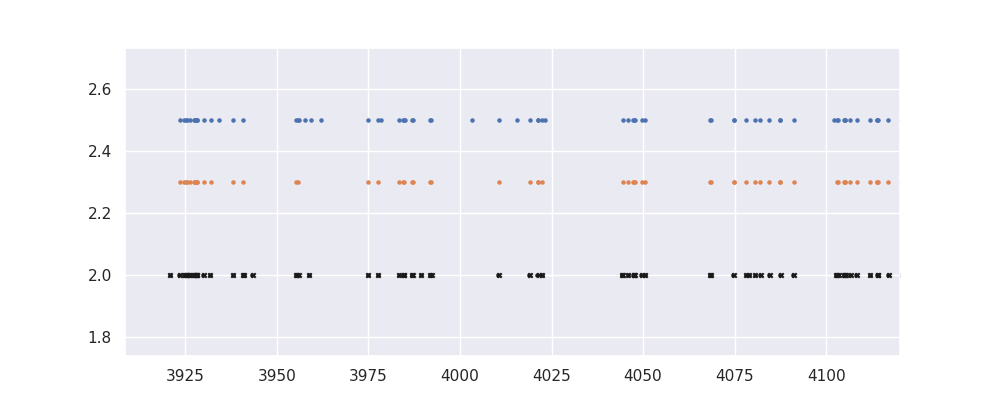

(1, 3)

In [31]:
# plot realtime and offline ripple starts
# 10 lfp tetrodes, sd = 4, 4 tets above threshold
#matching_offline_rips_3k = matching_offline_rips.copy()
#matching_offline_rips_3k_fwd = matching_offline_rips.copy()
#matching_offline_rips_9k_fwd = matching_offline_rips.copy()

off_rips_range = rips.copy()
off_rips_range['end_timestamp'] = off_rips_range['timestamp'] + ((off_rips_range['endtime'] - off_rips_range['starttime'])*30000)
off_rips_range

stim_lockout_file = stim_lockout2
realtime_rips_plot = stim_lockout_file[stim_lockout_file['lockout_state']==1]

plt.figure(figsize=(10,4))
plt.scatter(off_rips_range['timestamp'].values/30000,np.repeat(2, 1256),s=5,c='k')
plt.scatter(off_rips_range['end_timestamp'].values/30000,np.repeat(2, 1256),s=10,c='k',marker='x')
plt.scatter((realtime_rips_plot['timestamp'].values+1958987)/30000,np.repeat(2.5, 1309),s=5)
#plt.scatter((matching_offline_rips_3k['adj_timestamp'].values)/30000,np.repeat(2.45, 547),s=5)
#plt.scatter((matching_offline_rips_3k_fwd['adj_timestamp'].values)/30000,np.repeat(2.4, 408),s=5)
#plt.scatter((matching_offline_rips_9k_fwd['adj_timestamp'].values)/30000,np.repeat(2.35, 547),s=5)
plt.scatter((matching_offline_rips['adj_timestamp'].values)/30000,np.repeat(2.3, 1016),s=5)

plt.ylim([1,3])

In [429]:
#rips_test = rips.copy()
#rips_test['end_timestamp'] = rips_test['timestamp'] + ((rips_test['endtime'] - rips_test['starttime'])*30000)
rips_test
matching_offline_rips

,rec_ind,timestamp_x,time,lockout_num,lockout_state,tets_above_thresh,big_rip_message_sent,adj_timestamp,day,epoch,event,timestamp_y,starttime,endtime,maxthresh,off_dur,dup_offline
6,11900,43895760,0.646471,6,1,2,0,45854747,20.0,2.0,66.0,45852404.0,1528.413467,1528.517467,6.582024,0.104000,NaN
7,12439,44082520,1.224095,7,1,2,0,46041507,20.0,2.0,69.0,46038044.0,1534.601467,1534.742133,3.670240,0.140667,3.0
9,14735,44807740,1.114918,9,1,2,0,46766727,20.0,2.0,82.0,46763124.0,1558.770800,1558.888133,3.029981,0.117333,13.0
10,16220,45317800,0.952099,10,1,2,0,47276787,20.0,2.0,86.0,47273884.0,1575.796133,1576.112800,10.921949,0.316667,4.0
11,16285,45322320,1.404008,11,1,3,0,47281307,20.0,2.0,86.0,47273884.0,1575.796133,1576.112800,10.921949,0.316667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,365660,161133880,0.897671,677,1,2,0,163092867,20.0,2.0,2242.0,163088644.0,5436.288133,5436.611467,13.474237,0.323333,1.0
678,365749,161138400,0.574216,678,1,2,0,163097387,20.0,2.0,2242.0,163088644.0,5436.288133,5436.611467,13.474237,0.323333,0.0
679,367160,161566660,1.240392,679,1,2,0,163525647,20.0,2.0,2254.0,163524164.0,5450.805467,5450.864800,3.316852,0.059333,12.0
680,367241,161591400,1.343222,680,1,2,0,163550387,20.0,2.0,2255.0,163548024.0,5451.600800,5451.734800,5.551768,0.134000,1.0


<IPython.core.display.Javascript object>


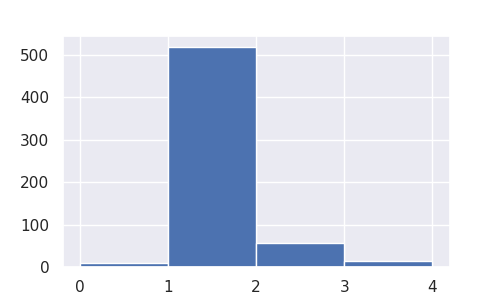

(array([  9., 519.,  57.,  13.]),
 array([0, 1, 2, 3, 4]),
 <a list of 4 Patch objects>)

In [414]:
# shows number of realtime ripple duplicates
# this comes from stim_lockout record
# look at value of 0 bin in histogram (9)
plt.figure(figsize=(5,3))
plt.hist(matching_offline_rips['lockout_num'].diff().values,bins=np.arange(0,5))

<IPython.core.display.Javascript object>


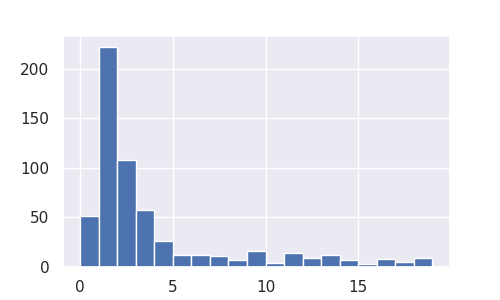

(array([ 51., 222., 108.,  58.,  26.,  12.,  12.,  11.,   7.,  16.,   4.,
         14.,   9.,  12.,   7.,   3.,   8.,   5.,   9.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 19 Patch objects>)

In [417]:
# shows number of real-time ripples that match the same offline ripples
# these are long offline ripples
# look at value of 0 bin in histogram (51)
plt.figure(figsize=(5,3))
plt.hist(matching_offline_rips['event'].diff().values,bins=np.arange(0,20))

In [232]:
## DONT USE - not a running sum and wrong linearization
# offline posteriors, 150 uV threshold
#offline arm ends 8, 25, 42, 59, 77, 94, 111, 128, 145 
arm_coords = [[0,8],[13,25],[30,42],[47,59],[65,77],[82,94],[99,111],[116,128],[133,145]]

summarize_all_rips_off = True

# now need to plot offline ripples that are mismatched

posterior_offline = posteriors2.reset_index()
offline_pos = binned_linear_pos.reset_index()
merged_off_post_pos = pd.merge_asof(posterior_offline,offline_pos,on='timestamp',direction='nearest')
offline_posterior_sum_all = np.zeros((len(matching_offline_rips),12))

for index, rip_timestamp in enumerate(matching_offline_rips['timestamp_x']):
    # to plot all ripples
    if summarize_all_rips_off:
    # to plotting mis-match replays
    #if matching_offline_rips['lockout_num'][index:index+1].values in non_matching['realtime_rip'].values:
        #print(matching_offline_rips['lockout_num'][index:index+1].values)
        #print(rip_timestamp-30*300,rip_timestamp+30*300,index)

        posterior_to_plot = merged_off_post_pos[(merged_off_post_pos['timestamp'] > rip_timestamp-30*300) & 
                                            (merged_off_post_pos['timestamp'] < rip_timestamp+30*300)]

        realtime_ripple_num = matching_offline_rips['lockout_num'][index:index+1].values
        ripple_num_index = int(len(posterior_to_plot)*0.55)
        ripple_num = posterior_to_plot[ripple_num_index:ripple_num_index+1]['ripple_grp'].values
    
        # calculate posterior sum during ripple
        # we need to only take out the time when ripple_grp matches ripple_grp at the middle of the plotting bin
    
        #post_sum_times = posterior_to_plot[posterior_to_plot['ripple_grp'] > 0]
        post_sum_times = posterior_to_plot[posterior_to_plot['ripple_grp'] == ripple_num[0]]
        ripple_length = post_sum_times.shape[0]
        # sum each arm over whole ripple
        post_sum_ripple = np.zeros((ripple_length,9))
        for i in np.arange(0,ripple_length):
            if i == 0:
                for j in np.arange(0,len(arm_coords),1):
                    post_sum_ripple[i,j] = post_sum_times.iloc[i,4:150].values[arm_coords[j][0]:arm_coords[j][1]].sum()

            else:
                for j in np.arange(0,len(arm_coords),1):
                    post_sum_ripple[i,j] = post_sum_ripple[i-1,j] + post_sum_times.iloc[i,4:150].values[arm_coords[j][0]:arm_coords[j][1]].sum()
            
        # normalize sum of whole ripple - this is the final row
        post_sum_ripple[i] = post_sum_ripple[i]/post_sum_ripple[i].sum()
    
        ripple_times = posterior_to_plot.index[posterior_to_plot['ripple_grp'] > 0].tolist()

        posterior_offline1 = posterior_to_plot.drop(['day_x','epoch_x','timestamp','time_x','num_spikes','dec_bin',
                                                 'ripple_grp','day_y','epoch_y','time_y','linpos_flat',
                                                 'linvel_flat'], axis=1)

        posterior_offline2 = posterior_offline1.fillna(0)
        post_heatmap = posterior_offline2.transpose()
        post_heatmap = post_heatmap.iloc[::-1]

        posterior_sum = np.around(post_sum_ripple[-1:],decimals=1)
        posterior_sum = posterior_sum[0]
    
        if len(np.argwhere(posterior_sum>=0.5)):
            arm_max = np.argwhere(posterior_sum>=0.5)[0][0]
        else:
            arm_max = 99 

        # fill in current row of posterior sum array - seems to work
        offline_posterior_sum_all[index,0] = ripple_num
        offline_posterior_sum_all[index,1] = realtime_ripple_num
        offline_posterior_sum_all[index,2] = arm_max
        offline_posterior_sum_all[index,3] = posterior_sum[0]
        offline_posterior_sum_all[index,4] = posterior_sum[1]
        offline_posterior_sum_all[index,5] = posterior_sum[2]
        offline_posterior_sum_all[index,6] = posterior_sum[3]
        offline_posterior_sum_all[index,7] = posterior_sum[4]
        offline_posterior_sum_all[index,8] = posterior_sum[5]
        offline_posterior_sum_all[index,9] = posterior_sum[6]
        offline_posterior_sum_all[index,10] = posterior_sum[7]
        offline_posterior_sum_all[index,11] = posterior_sum[8]
                                     
        #plt.figure(figsize=(12,5))
        #plt.title(f'Off rip {ripple_num}. RT rip {realtime_ripple_num} Arm {arm_max} {posterior_sum}')
        #ax = (sns.heatmap(post_heatmap,vmin=0, vmax=0.7))
        #ax.hlines([145-10,145-27,145-44,145-61,145-79,145-96,145-113,145-130], lw=2, color='w',*ax.get_xlim())
        #ax.scatter(np.arange(0,posterior_to_plot.shape[0]),145-posterior_to_plot['linpos_flat'].values,s=2,alpha=1,color='cyan')
        #ax.vlines([ripple_times-posterior_to_plot.index[0]],lw=1,color='w',alpha=0.2,*ax.get_ylim())
    
        # final step: save the figure
        #plt.savefig(f'/stelmo/mcoulter/posterior_plots_by_ripple/remy_20_2_offline_2_20_rip_nonmatching_{ripple_num}_real_rip_{realtime_ripple_num}_timestamp_{rip_timestamp}.jpg')

# convert offline_posterior_sum_all array to pandas
# only run this first time through - not with non-matching

off_post_sum_summary = pd.DataFrame(data=offline_posterior_sum_all,columns=('offline_rip','realtime_rip',
                                                                            'off_max_arm','box','arm1','arm2',
                                                                            'arm3','arm4','arm5','arm6',
                                                                            'arm7','arm8'))

off_post_sum_summary.shape

(544, 12)

In [294]:
binned_linear_pos[binned_linear_pos['linpos_flat']==140]
matching_offline_rips.shape

(544, 15)

In [455]:
# running sum version for offline ripples - 50 msec running sum means 11 bins
# offline posteriors, 150 uV threshold
#offline arm ends 8, 25, 42, 59, 77, 94, 111, 128, 145 
# old linearization
#arm_coords = [[0,8],[13,25],[30,42],[47,59],[65,77],[82,94],[99,111],[116,128],[133,145]]
# new linearization
arm_coords = [[0,8],[13,25],[29,41],[45,57],[62,74],[78,90],[94,106],[111,123],[127,139]]

summarize_all_rips_offline = True

# now need to plot offline ripples that are mismatched

posterior_offline = posteriors2.reset_index()
offline_pos = binned_linear_pos.reset_index()
merged_off_post_pos = pd.merge_asof(posterior_offline,offline_pos,on='timestamp',direction='nearest')
offline_posterior_sum_all = np.zeros((len(matching_offline_rips),14))

# number of bins for sliding window sum
sliding_window = 11

# updated for new matching_offline_rips merge timestamp_x -> timestamp_y
for index, rip_timestamp in enumerate(matching_offline_rips['timestamp_y']):
    posterior_sum_array = np.zeros((sliding_window,9))
    short_ripple = False
    # to plot all ripples
    if summarize_all_rips_offline:
    # to plotting mis-match replays
    #if matching_offline_rips['lockout_num'][index:index+1].values in non_matching['realtime_rip'].values:
        #print(matching_offline_rips['lockout_num'][index:index+1].values)
        #print(rip_timestamp-30*300,rip_timestamp+30*300,index)

        posterior_to_plot = merged_off_post_pos[(merged_off_post_pos['timestamp'] > rip_timestamp-30*300) & 
                                            (merged_off_post_pos['timestamp'] < rip_timestamp+30*300)]

        realtime_ripple_num = matching_offline_rips['lockout_num'][index:index+1].values
        ripple_num_index = int(len(posterior_to_plot)*0.55)
        ripple_num = posterior_to_plot[ripple_num_index:ripple_num_index+1]['ripple_grp'].values
    
        # calculate posterior sum during ripple
        # we need to only take out the time when ripple_grp matches ripple_grp at the middle of the plotting bin
    
        #post_sum_times = posterior_to_plot[posterior_to_plot['ripple_grp'] > 0]
        post_sum_times = posterior_to_plot[posterior_to_plot['ripple_grp'] == ripple_num[0]]
        ripple_length = post_sum_times.shape[0]
        #if ripple_length < 12:
        #    print(index,ripple_length)
        
        # if ripple is less than 12 bins: sum whole ripple
        if ripple_length < 12:
            # sum each arm over whole ripple
            post_sum_ripple = np.zeros((ripple_length,9))
            for i in np.arange(0,ripple_length):
                if i == 0:
                    for j in np.arange(0,len(arm_coords),1):
                        post_sum_ripple[i,j] = post_sum_times.iloc[i,4:150].values[arm_coords[j][0]:arm_coords[j][1]].sum()
                else:
                    for j in np.arange(0,len(arm_coords),1):
                        post_sum_ripple[i,j] = post_sum_ripple[i-1,j] + post_sum_times.iloc[i,4:150].values[arm_coords[j][0]:arm_coords[j][1]].sum()
            
            # normalize sum of whole ripple - this is the final row
            short_ripple = True
            post_sum_ripple[i] = post_sum_ripple[i]/post_sum_ripple[i].sum()
            posterior_sum = np.around(post_sum_ripple[-1:],decimals=1)
            posterior_sum = posterior_sum[0]
    
            if len(np.argwhere(posterior_sum>=0.5)):
                arm_max = np.argwhere(posterior_sum>=0.5)[0][0]
            else:
                arm_max = 99 
                
        # if ripple 12 or more bins: use sliding window sum
        else:
            #print('long_ripple',ripple_length)
            stop_post_sum = False
            post_sum_ripple = np.zeros((ripple_length,9))
            for i in np.arange(0,ripple_length):
                # first sum across arms
                for j in np.arange(0,len(arm_coords),1):
                    post_sum_ripple[i,j] = post_sum_times.iloc[i,4:150].values[arm_coords[j][0]:arm_coords[j][1]].sum()
                # then fill in sliding window array
                posterior_sum_array[np.mod(i,sliding_window),:] = post_sum_ripple[i]
                sum_array_sum = np.sum(posterior_sum_array,axis=0)
                norm_posterior_arm_sum = sum_array_sum/sliding_window
                if i > 10 and not stop_post_sum:
                    posterior_sum = np.around(norm_posterior_arm_sum,decimals=1)
                    #print(posterior_sum)
                    #posterior_sum = posterior_sum[0]
                    if len(np.argwhere(posterior_sum>=0.5)):
                        arm_max = np.argwhere(posterior_sum>=0.5)[0][0]
                    else:
                        arm_max = 99
                    if arm_max > 0 and arm_max < 9:
                        stop_post_sum = True
                        #print('post sum meets criteria. bin',i,'arm',arm_max)
        
        ripple_times = posterior_to_plot.index[posterior_to_plot['ripple_grp'] > 0].tolist()

        posterior_offline1 = posterior_to_plot.drop(['day_x','epoch_x','timestamp','time_x','num_spikes','dec_bin',
                                                 'ripple_grp','day_y','epoch_y','time_y','linpos_flat',
                                                 'linvel_flat'], axis=1)

        posterior_offline2 = posterior_offline1.fillna(0)
        post_heatmap = posterior_offline2.transpose()
        post_heatmap = post_heatmap.iloc[::-1]

        #posterior_sum = np.around(post_sum_ripple[-1:],decimals=1)
        #posterior_sum = posterior_sum[0]
    
        #if len(np.argwhere(posterior_sum>=0.5)):
        #    arm_max = np.argwhere(posterior_sum>=0.5)[0][0]
        #else:
        #    arm_max = 99 

        # fill in current row of posterior sum array - seems to work
        offline_posterior_sum_all[index,0] = ripple_num
        offline_posterior_sum_all[index,1] = realtime_ripple_num
        offline_posterior_sum_all[index,2] = arm_max
        offline_posterior_sum_all[index,3] = posterior_sum[0]
        offline_posterior_sum_all[index,4] = posterior_sum[1]
        offline_posterior_sum_all[index,5] = posterior_sum[2]
        offline_posterior_sum_all[index,6] = posterior_sum[3]
        offline_posterior_sum_all[index,7] = posterior_sum[4]
        offline_posterior_sum_all[index,8] = posterior_sum[5]
        offline_posterior_sum_all[index,9] = posterior_sum[6]
        offline_posterior_sum_all[index,10] = posterior_sum[7]
        offline_posterior_sum_all[index,11] = posterior_sum[8]
        offline_posterior_sum_all[index,12] = ripple_length
        offline_posterior_sum_all[index,13] = short_ripple
                                     
        #plt.figure(figsize=(8,4))
        #plt.title(f'Off rip {ripple_num}. RT rip {realtime_ripple_num} Arm {arm_max} {posterior_sum} Len {ripple_length}')
        #ax = (sns.heatmap(post_heatmap,vmin=0, vmax=0.7))
        #ax.hlines([145-10,145-27,145-44,145-61,145-79,145-96,145-113,145-130], lw=2, color='w',*ax.get_xlim())
        #ax.scatter(np.arange(0,posterior_to_plot.shape[0]),145-posterior_to_plot['linpos_flat'].values,s=2,alpha=1,color='cyan')
        #ax.vlines([ripple_times-posterior_to_plot.index[0]],lw=1,color='w',alpha=0.2,*ax.get_ylim())
    
        # final step: save the figure
        #plt.savefig(f'/stelmo/mcoulter/posterior_plots_by_ripple/remy_20_2_offline_2_20_rip_nonmatching_{ripple_num}_real_rip_{realtime_ripple_num}_timestamp_{rip_timestamp}.jpg')

# convert offline_posterior_sum_all array to pandas
# only run this first time through - not with non-matching

off_post_sum_summary = pd.DataFrame(data=offline_posterior_sum_all,columns=('offline_rip','realtime_rip',
                                                                            'off_max_arm','box','arm1','arm2',
                                                                            'arm3','arm4','arm5','arm6',
                                                                            'arm7','arm8',
                                                                            'rip_length','short_rip'))

off_post_sum_summary.shape

(547, 14)

In [ ]:
# old linearization
# plot histogram of offline replay arms
off_post_sum_summary
plt.hist(off_post_sum_summary['off_max_arm'].values,bins=np.arange(0,100))
#print(off_post_sum_summary.shape)
#off_post_sum_summary[(off_post_sum_summary['off_max_arm']>=1) & (off_post_sum_summary['off_max_arm']<=8)]

In [ ]:
# new linearization
# plot histogram of offline replay arms
off_post_sum_summary
plt.hist(off_post_sum_summary['off_max_arm'].values,bins=np.arange(0,100))

(547, 19)


<IPython.core.display.Javascript object>


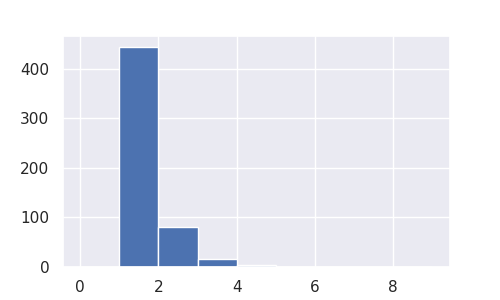

(array([  0., 444.,  81.,  16.,   5.,   0.,   0.,   0.,   0.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

In [459]:
# join offline and realtime replay summaries
replay_summary_combined = pd.DataFrame.join(off_post_sum_summary,realtime_post_sum_summary,on='realtime_rip',
                                            how='outer',lsuffix='off',rsuffix='rt')
replay_combined_matching = replay_summary_combined[replay_summary_combined['offline_rip']>0]
#replay_combined_matching = replay_combined_matching[replay_combined_matching['rt_two_messages']>0]
#replay_summary_combined['realtime_ripoff'].values
print(replay_combined_matching.shape)

# what is this plot showing???? - showing duplicate real-time rips (0 bin in histogram)
plt.figure(figsize=(5,3))
plt.hist(replay_combined_matching['realtime_rip'].diff(),bins=np.arange(0,10))

In [460]:
# is there a way to remove the duplicates? - should we?
# include fractions in the print out summary

# re-run without dealy
# re-run with delay and full session

# make histogram of classification for all replays

#summarize matching between offline and realtime
print('total matching:',replay_combined_matching.shape[0])

#exact match
print('exact match:',(replay_combined_matching[replay_combined_matching['off_max_arm'].values == replay_combined_matching['rt_max_arm'].values]).shape[0])

# non-matching
non_matching = replay_combined_matching[replay_combined_matching['off_max_arm'].values != replay_combined_matching['rt_max_arm'].values]
print('non-matching:',non_matching.shape[0])
# count for each arm in realtime replays
print('realtime below 0.5:',non_matching[non_matching['rt_max_arm'] == 99].shape[0])
print('realtime box:',non_matching[non_matching['rt_max_arm'] == 0].shape[0])
print('realtime arm 1:',non_matching[non_matching['rt_max_arm'] == 1].shape[0])
print('realtime arm 2:',non_matching[non_matching['rt_max_arm'] == 2].shape[0])
print('realtime arm 3:',non_matching[non_matching['rt_max_arm'] == 3].shape[0])
print('realtime arm 4:',non_matching[non_matching['rt_max_arm'] == 4].shape[0])
print('realtime arm 5:',non_matching[non_matching['rt_max_arm'] == 5].shape[0])
print('realtime arm 6:',non_matching[non_matching['rt_max_arm'] == 6].shape[0])
print('realtime arm 7:',non_matching[non_matching['rt_max_arm'] == 7].shape[0])
print('realtime arm 8:',non_matching[non_matching['rt_max_arm'] == 8].shape[0])

# offline: no arm above 0.5
print('offline < 0.5, mismatch total:',non_matching[non_matching['off_max_arm'] == 99].shape[0])
print('offline < 0.5, realtime box:',non_matching[(non_matching['off_max_arm'] == 99) & (non_matching['rt_max_arm'] == 0)].shape[0])
print('offline < 0.5, realtime other arm:',non_matching[(non_matching['off_max_arm'] == 99) & (non_matching['rt_max_arm'] != 0)].shape[0])

# offline: box
print('offline box, mismatch total:',non_matching[non_matching['off_max_arm'] == 0].shape[0])
print('offline box, realtime < 0.5:',non_matching[(non_matching['off_max_arm'] == 0) & (non_matching['rt_max_arm'] == 99)].shape[0])
print('offline box, realtime other arm:',non_matching[(non_matching['off_max_arm'] == 0) & (non_matching['rt_max_arm'] != 99)].shape[0])

# offline: outer arm
print('offline arm, mismatch total:',non_matching[(non_matching['off_max_arm'] > 0)&(non_matching['off_max_arm'] < 10)].shape[0])
print('offline arm, realtime < 0.5:',non_matching[(non_matching['off_max_arm'] > 0)&(non_matching['off_max_arm'] < 10) & (non_matching['rt_max_arm'] == 99)].shape[0])
print('offline arm, realtime box:',non_matching[(non_matching['off_max_arm'] > 0)&(non_matching['off_max_arm'] < 10) & (non_matching['rt_max_arm'] == 0)].shape[0])
print('offline arm, realtime other arm:',non_matching[(non_matching['off_max_arm'] > 0)&(non_matching['off_max_arm'] < 10) & (non_matching['rt_max_arm'] > 0)&(non_matching['rt_max_arm'] < 10)].shape[0])


total matching: 547
exact match: 323
non-matching: 224
realtime below 0.5: 67
realtime box: 129
realtime arm 1: 3
realtime arm 2: 1
realtime arm 3: 1
realtime arm 4: 3
realtime arm 5: 2
realtime arm 6: 15
realtime arm 7: 1
realtime arm 8: 2
offline < 0.5, mismatch total: 26
offline < 0.5, realtime box: 20
offline < 0.5, realtime other arm: 6
offline box, mismatch total: 38
offline box, realtime < 0.5: 29
offline box, realtime other arm: 9
offline arm, mismatch total: 160
offline arm, realtime < 0.5: 38
offline arm, realtime box: 109
offline arm, realtime other arm: 13


In [311]:
# what is distribution of all real-time replays with 2 message
print('total matching:',replay_combined_matching.shape[0])
# count for each arm in realtime replays
print('realtime below 0.5:',replay_combined_matching[replay_combined_matching['rt_max_arm'] == 99].shape[0])
print('realtime box:',replay_combined_matching[replay_combined_matching['rt_max_arm'] == 0].shape[0])
print('realtime arm 1:',replay_combined_matching[replay_combined_matching['rt_max_arm'] == 1].shape[0])
print('realtime arm 2:',replay_combined_matching[replay_combined_matching['rt_max_arm'] == 2].shape[0])
print('realtime arm 3:',replay_combined_matching[replay_combined_matching['rt_max_arm'] == 3].shape[0])
print('realtime arm 4:',replay_combined_matching[replay_combined_matching['rt_max_arm'] == 4].shape[0])
print('realtime arm 5:',replay_combined_matching[replay_combined_matching['rt_max_arm'] == 5].shape[0])
print('realtime arm 6:',replay_combined_matching[replay_combined_matching['rt_max_arm'] == 6].shape[0])
print('realtime arm 7:',replay_combined_matching[replay_combined_matching['rt_max_arm'] == 7].shape[0])
print('realtime arm 8:',replay_combined_matching[replay_combined_matching['rt_max_arm'] == 8].shape[0])

print('off below 0.5:',replay_combined_matching[replay_combined_matching['off_max_arm'] == 99].shape[0])
print('off box:',replay_combined_matching[replay_combined_matching['off_max_arm'] == 0].shape[0])
print('off arm 1:',replay_combined_matching[replay_combined_matching['off_max_arm'] == 1].shape[0])
print('off arm 2:',replay_combined_matching[replay_combined_matching['off_max_arm'] == 2].shape[0])
print('off arm 3:',replay_combined_matching[replay_combined_matching['off_max_arm'] == 3].shape[0])
print('off arm 4:',replay_combined_matching[replay_combined_matching['off_max_arm'] == 4].shape[0])
print('off arm 5:',replay_combined_matching[replay_combined_matching['off_max_arm'] == 5].shape[0])
print('off arm 6:',replay_combined_matching[replay_combined_matching['off_max_arm'] == 6].shape[0])
print('off arm 7:',replay_combined_matching[replay_combined_matching['off_max_arm'] == 7].shape[0])
print('off arm 8:',replay_combined_matching[replay_combined_matching['off_max_arm'] == 8].shape[0])

#replay_combined_matching

total matching: 109
realtime below 0.5: 0
realtime box: 0
realtime arm 1: 13
realtime arm 2: 7
realtime arm 3: 6
realtime arm 4: 8
realtime arm 5: 25
realtime arm 6: 20
realtime arm 7: 16
realtime arm 8: 14
off below 0.5: 4
off box: 29
off arm 1: 11
off arm 2: 4
off arm 3: 8
off arm 4: 1
off arm 5: 19
off arm 6: 12
off arm 7: 12
off arm 8: 9


In [437]:
replay_combined_matching[replay_combined_matching['rt_two_messages']>0]
#non_matching[non_matching['rt_two_messages']==1]

,realtime_rip,offline_rip,realtime_ripoff,off_max_arm,box,arm1,arm2,arm3,arm4,arm5,arm6,arm7,arm8,rip_length,short_rip,realtime_riprt,rt_max_arm,rt_two_messages,rt_delay


# error calculation

In [16]:
# generate posterior error dataframe for real-time data
post_error1 = decoder_data1.copy()

post_error1.drop(columns=['rec_ind','bin_timestamp','wall_time','velocity','real_pos',
                         'raw_x','raw_y','smooth_x','smooth_y','next_bin',
                         'spike_count','ripple','ripple_number','ripple_length',
                         'shortcut_message','box','arm1','arm2','arm3','arm4','arm5',
                         'arm6','arm7','arm8'], inplace=True)
post_error1.fillna(0,inplace=True)
post_error1['max_position'] = post_error1.idxmax(axis=1)
post_error1['max_position'] = post_error1['max_position'].str.replace('x','')
post_error1['max_position'] = post_error1['max_position'].astype(int)

#now need to add back columns 'timestamp','real_pos_time','real_pos'
# try adding back spike_count too
post_error1['timestamp'] = decoder_data1['bin_timestamp']
post_error1['real_vel'] = decoder_data1['velocity']
post_error1['real_pos'] = decoder_data1['real_pos']
post_error1['spike_count'] = decoder_data1['spike_count']
#this is the error column in centimeters
post_error1['error_cm'] = abs(post_error1['max_position']-decoder_data1['real_pos'])*5

post_error1
post_error_plot1 = post_error1.copy()
#post_error_plot9 = post_error_plot9
post_error_plot1 = post_error_plot1[post_error_plot1['real_vel']>5]
post_error_plot1.shape

(177698, 143)

In [123]:
binned_linear_pos

<_FlatLinearPosition: d6c3909f-4bd7-43c6-b1d2-2e8115900c19, shape: ((122655, 2))>

In [124]:
#calculate max for offline posteriors
post_to_merge = posteriors2.copy()

#calculate posterior max
post_to_merge1 = post_to_merge.drop(['num_spikes','dec_bin','ripple_grp'], axis=1)
post_to_merge1.fillna(0,inplace=True)
post_to_merge1['posterior_max'] = post_to_merge1.idxmax(axis=1)
post_to_merge1['posterior_max'] = post_to_merge1['posterior_max'].str.replace('x','')
post_to_merge1['posterior_max'] = post_to_merge1['posterior_max'].astype(int)

#post_to_merge.reset_index(level=['timestamp'],inplace=True)
post_to_merge1.reset_index(inplace=True)
post_to_merge1['timestamp1']=post_to_merge1['timestamp']

#calculate posterior max

#post_to_merge.set_index('timestamp', append=True, inplace=True)
#post_to_merge.set_index('dat','epoch','timestamp', 'time',append=True, inplace=True)
#post_to_merge1 = post_to_merge.reorder_levels(['day', 'epoch', 'timestamp', 'time'])
post_to_merge1

pos_vel = binned_linear_pos.copy()
pos_vel1 = pos_vel.reset_index()
pos_vel1['timestamp1'] = pos_vel1['timestamp']
pos_vel2 = pos_vel1.drop(['day','epoch','time','timestamp'], axis=1)

posterior_with_pos_vel = pd.merge_asof(post_to_merge1,pos_vel2,on='timestamp1',direction='nearest')
posterior_with_pos_vel['error_cm'] = abs(posterior_with_pos_vel['posterior_max']-posterior_with_pos_vel['linpos_flat'])*5
posterior_with_pos_vel

post_error_plot_off = posterior_with_pos_vel.copy()
#post_error_plot_off = post_error_plot[100:821700]
#post_error_plot_off = post_error_plot_off[post_error_plot_off['linvel_flat']>4]
post_error_plot_off.shape

(821703, 155)

<IPython.core.display.Javascript object>


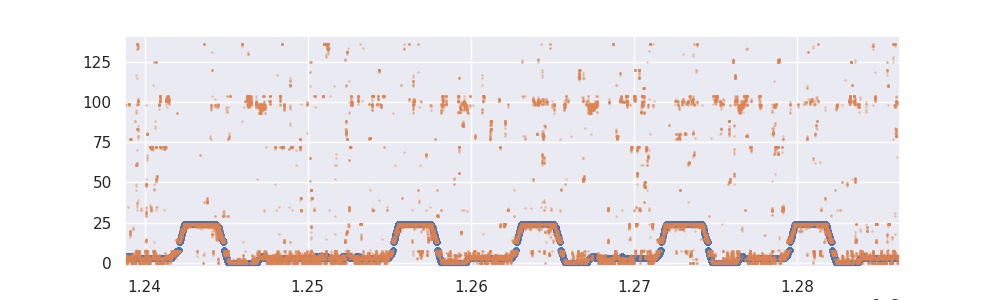

In [10]:
%matplotlib notebook
# plot decoded max posterior and real position
plt.figure(figsize=(10,3))

#post_error_plot_subset = post_error_plot3[(post_error_plot3['timestamp']>124500000) & 
#                                          (post_error_plot3['timestamp']<124700000)]

plt.scatter(post_error_plot['timestamp'].values,post_error_plot['real_pos'].values,s=10)
plt.scatter(post_error_plot['timestamp'].values,post_error_plot['max_position'].values,s=1,alpha=0.3)


<IPython.core.display.Javascript object>


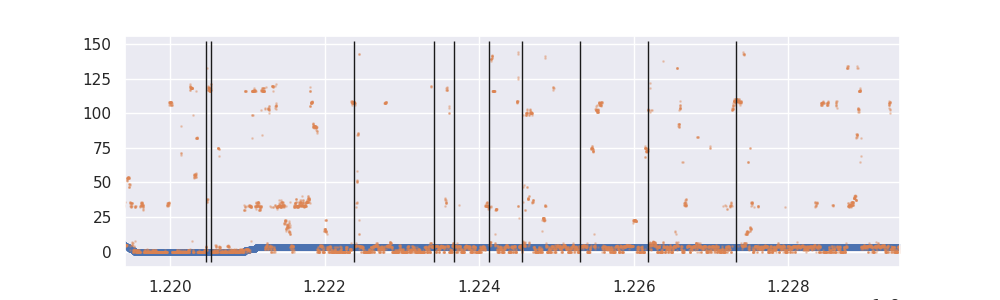

In [126]:
# plot offline max posterior and real position
plt.figure(figsize=(10,3))

#post_error_plot_subset = post_error_plot3[(post_error_plot3['timestamp']>124500000) & 
#                                          (post_error_plot3['timestamp']<124700000)]

plt.scatter(post_error_plot_off['timestamp'].values,post_error_plot_off['linpos_flat'].values,s=10)
plt.scatter(post_error_plot_off['timestamp'].values,post_error_plot_off['posterior_max'].values,s=1,alpha=0.3)
plt.vlines(rips['timestamp'].values,lw=1,color='k',alpha=1,*plt.ylim())


In [ ]:
# remote error
# only calculate error during movement
#post_error_plot7 = post_error_plot7[post_error_plot7['real_vel']>8]
post_error_plot5 = post_error_plot1.copy()

#arm_coords_rt = [[0,7],[12,23],[28,39],[44,55],[60,71],[76,87],[92,103],[108,119],[124,135]]
# new arm_coords 2-2020: [[0,8],[13,24],[29,40],[45,56],[61,72],[77,88],[93,104],[109,120],[125,136]]
box = post_error_plot5[(post_error_plot5['real_pos']>=0) & (post_error_plot5['real_pos']<=8)]
arm1 = post_error_plot5[(post_error_plot5['real_pos']>=13) & (post_error_plot5['real_pos']<=24)]
arm2 = post_error_plot5[(post_error_plot5['real_pos']>=29) & (post_error_plot5['real_pos']<=40)]
arm3 = post_error_plot5[(post_error_plot5['real_pos']>=45) & (post_error_plot5['real_pos']<=56)]
arm4 = post_error_plot5[(post_error_plot5['real_pos']>=61) & (post_error_plot5['real_pos']<=72)]
arm5 = post_error_plot5[(post_error_plot5['real_pos']>=77) & (post_error_plot5['real_pos']<=88)]
arm6 = post_error_plot5[(post_error_plot5['real_pos']>=93) & (post_error_plot5['real_pos']<=104)]
arm7 = post_error_plot5[(post_error_plot5['real_pos']>=109) & (post_error_plot5['real_pos']<=120)]
arm8 = post_error_plot5[(post_error_plot5['real_pos']>=125) & (post_error_plot5['real_pos']<=136)]
print(arm1.shape[0])
print(post_error_plot5.shape)
# fraction of bins with remote error
box_remote_error = ((box.shape[0] - box[(box['max_position']>=0) & (box['max_position']<=8)].shape[0])/box.shape[0])
arm1_remote_error = ((arm1.shape[0] - arm1[(arm1['max_position']>=13) & (arm1['max_position']<=24)].shape[0])/arm1.shape[0])
arm2_remote_error = ((arm2.shape[0] - arm2[(arm2['max_position']>=29) & (arm2['max_position']<=40)].shape[0])/arm2.shape[0])
arm3_remote_error = ((arm3.shape[0] - arm3[(arm3['max_position']>=45) & (arm3['max_position']<=56)].shape[0])/arm3.shape[0])
arm4_remote_error = ((arm4.shape[0] - arm4[(arm4['max_position']>=61) & (arm4['max_position']<=72)].shape[0])/arm4.shape[0])
arm5_remote_error = ((arm5.shape[0] - arm5[(arm5['max_position']>=77) & (arm5['max_position']<=88)].shape[0])/arm5.shape[0])
arm6_remote_error = ((arm6.shape[0] - arm6[(arm6['max_position']>=93) & (arm6['max_position']<=104)].shape[0])/arm6.shape[0])
arm7_remote_error = ((arm7.shape[0] - arm7[(arm7['max_position']>=109) & (arm7['max_position']<=120)].shape[0])/arm7.shape[0])
arm8_remote_error = ((arm8.shape[0] - arm8[(arm8['max_position']>=125) & (arm8['max_position']<=136)].shape[0])/arm8.shape[0])

#print error values
print(box_remote_error,arm1_remote_error,arm2_remote_error,arm3_remote_error,arm4_remote_error,arm5_remote_error,arm6_remote_error,arm7_remote_error,arm8_remote_error)
box_frac = box.shape[0]/post_error_plot5.shape[0]
arm1_frac = arm1.shape[0]/post_error_plot5.shape[0]
arm2_frac = arm2.shape[0]/post_error_plot5.shape[0]
arm3_frac = arm3.shape[0]/post_error_plot5.shape[0]
arm4_frac = arm4.shape[0]/post_error_plot5.shape[0]
arm5_frac = arm5.shape[0]/post_error_plot5.shape[0]
arm6_frac = arm6.shape[0]/post_error_plot5.shape[0]
arm7_frac = arm7.shape[0]/post_error_plot5.shape[0]
arm8_frac = arm8.shape[0]/post_error_plot5.shape[0]

# fraction of arm-only time
arm1_frac1 = arm1.shape[0]/(post_error_plot5.shape[0]*(1-box_frac))
arm2_frac1 = arm2.shape[0]/(post_error_plot5.shape[0]*(1-box_frac))
arm3_frac1 = arm3.shape[0]/(post_error_plot5.shape[0]*(1-box_frac))
arm4_frac1 = arm4.shape[0]/(post_error_plot5.shape[0]*(1-box_frac))
arm5_frac1 = arm5.shape[0]/(post_error_plot5.shape[0]*(1-box_frac))
arm6_frac1 = arm6.shape[0]/(post_error_plot5.shape[0]*(1-box_frac))
arm7_frac1 = arm7.shape[0]/(post_error_plot5.shape[0]*(1-box_frac))
arm8_frac1 = arm8.shape[0]/(post_error_plot5.shape[0]*(1-box_frac))
#weighted average for box + each arm
print((box_remote_error*box_frac + arm1_remote_error*arm1_frac +arm2_remote_error*arm2_frac +
       arm3_remote_error*arm3_frac +arm4_remote_error*arm4_frac +arm5_remote_error*arm5_frac +
       arm6_remote_error*arm6_frac +arm7_remote_error*arm7_frac +arm8_remote_error*arm8_frac))
# weighted average no box
print((arm1_remote_error*arm1_frac1 +arm2_remote_error*arm2_frac1 +arm3_remote_error*arm3_frac1 +
       arm4_remote_error*arm4_frac1 +arm5_remote_error*arm5_frac1 +arm6_remote_error*arm6_frac1 +
       arm7_remote_error*arm7_frac1 +arm8_remote_error*arm8_frac1))


In [ ]:
# local error
# NOTE: need to update arm coords
box_local = box[(box['max_position']>-1) & (box['max_position']<8)]
arm1_local = arm1[(arm1['max_position']>11) & (arm1['max_position']<24)]
arm2_local = arm2[(arm2['max_position']>27) & (arm2['max_position']<40)]
arm3_local = arm3[(arm3['max_position']>43) & (arm3['max_position']<56)]
arm4_local = arm4[(arm4['max_position']>59) & (arm4['max_position']<72)]
arm5_local = arm5[(arm5['max_position']>75) & (arm5['max_position']<88)]
arm6_local = arm6[(arm6['max_position']>91) & (arm6['max_position']<104)]
arm7_local = arm7[(arm7['max_position']>107) & (arm7['max_position']<120)]
arm8_local = arm8[(arm8['max_position']>123) & (arm8['max_position']<136)]

box_local_error = np.median(box_local['error_cm'].values)
arm1_local_error = np.median(arm1_local['error_cm'].values)
arm2_local_error = np.median(arm2_local['error_cm'].values)
arm3_local_error = np.median(arm3_local['error_cm'].values)
arm4_local_error = np.median(arm4_local['error_cm'].values)
arm5_local_error = np.median(arm5_local['error_cm'].values)
arm6_local_error = np.median(arm6_local['error_cm'].values)
arm7_local_error = np.median(arm7_local['error_cm'].values)
arm8_local_error = np.median(arm8_local['error_cm'].values)

print(arm1_local_error,arm2_local_error,arm3_local_error,arm4_local_error,arm5_local_error,arm6_local_error,arm7_local_error,arm8_local_error,)

# total bins with local error
local_total_bins = (arm1_local.shape[0]+arm2_local.shape[0]+arm3_local.shape[0]+arm4_local.shape[0]+
                    arm5_local.shape[0]+arm6_local.shape[0]+arm7_local.shape[0]+arm8_local.shape[0])
local_total_bins
#weighted average for each arm
(arm1_local_error*(arm1_local.shape[0]/local_total_bins)+arm2_local_error*(arm2_local.shape[0]/local_total_bins)+
 arm3_local_error*(arm3_local.shape[0]/local_total_bins)+arm4_local_error*(arm4_local.shape[0]/local_total_bins)+
 arm5_local_error*(arm5_local.shape[0]/local_total_bins)+arm6_local_error*(arm6_local.shape[0]/local_total_bins)+
 arm7_local_error*(arm7_local.shape[0]/local_total_bins)+
 arm8_local_error*(arm8_local.shape[0]/local_total_bins))